In [1]:
from Detector.detector import Detector_v4, Detector_v3
from PIL import Image
import torch
from torchvision import transforms
import Detector.visualize as visualize  # TODO check imports
import re
import glob
import os
import numpy as np
import imp
import matplotlib.pyplot as plt
import numpy as np

In [2]:
detector = Detector_v4()

Detector initiated successfully


In [38]:
imp.reload(visualize)

<module 'Detector.visualize' from '/app/Pogona_Pursuit/Detector/visualize.py'>

In [40]:
detector.set_conf_and_nms(new_conf_thres=0.05)

In [11]:
test_video_path = "./Arena/output/20200615-181757/19506481.avi"

In [124]:
NUM_FRAMES = 3000
d = visualize.save_pred_video(test_video_path, 
                              "labelled/1506_175044_dots.mp4", 
                              detector,num_frames=NUM_FRAMES, 
                              visAngle=True,
                              dots=True,
                              arrowWindow=240)

  0%|          | 1/3000 [00:00<06:38,  7.52it/s]

saving to:  labelled/1506_175044_dots.mp4
width: 1440, height: 1080


100%|██████████| 3000/3000 [01:15<00:00, 39.76it/s]


Read :  0.0043986449241638186
Rsz_inf :  0.01324078877766927
Write :  0.0065578482151031495


In [45]:
%matplotlib inline

In [125]:
d_vid_175044 = d
times = d[0]
centros = d[1][:,:2]

speed = visualize.compute_velocity(centros)
confs = d[1][:,2]
for k in times.keys():
    print(k,": ",round(1/times[k].mean()))
times['Total'] = np.sum(np.stack([times[k] for k in times.keys() if k!='Total'],axis=1),axis=1)
print("Average FPS: ",round(1/times['Total'].mean()))

Read :  227.0
Rsz_inf :  76.0
Write :  152.0
Average FPS:  41.0


In [5]:
cents_17 = np.load('cents_175044.npy')
cents_18 = np.load('cents_181757.npy')

In [60]:
%matplotlib agg
imp.reload(visualize)
test_video_path = "./Arena/output/20200615-175044/19506481.avi"
visualize.plot_with_figure(input_name=test_video_path,
                           output_name='labelled/1506_175044_fig_over_subs.mp4',
                           centroids=cents_17,
                           num_frames=3000)

  0%|          | 3/3000 [00:00<02:40, 18.67it/s]

width: 1440, height: 1080


100%|██████████| 3000/3000 [04:53<00:00, 10.23it/s]


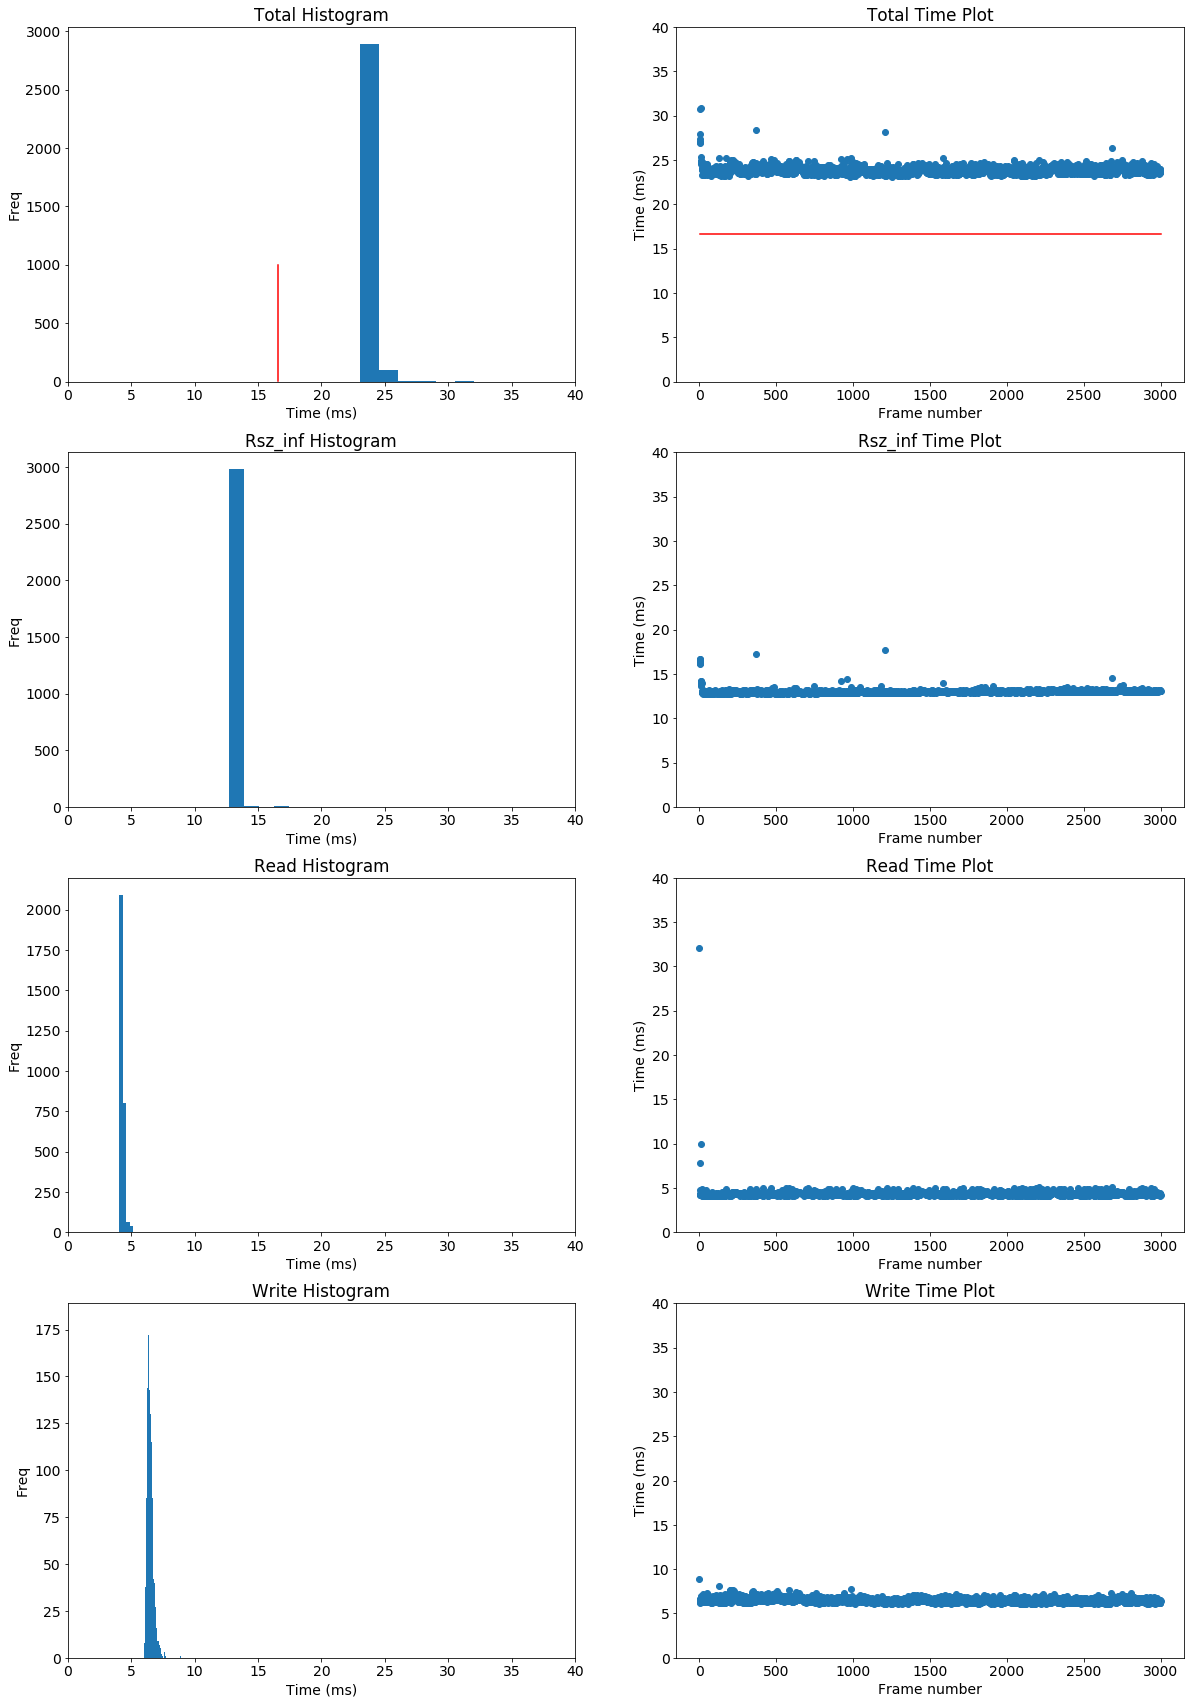

In [13]:
XLIM=40
YLIM=40

TOTAL_XLIM = 80
TOTAL_YLIM = 80


# phases = ['Read','BGR2RGB','resize_image','Inference','Write'] # execution order
phases = ['Rsz_inf','Read','Write'] # sorted order
fig,axs = plt.subplots(len(phases)+1,2,figsize=(20,30))
k='Total'
axs[0][0].set_title(k+' Histogram')
axs[0][1].set_title(k+' Time Plot')
axs[0][0].hist(times[k]*1000,label=k,bins=100)
axs[0][0].set_xlim(0,XLIM)
axs[0][0].set_xlabel('Time (ms)')
axs[0][1].set_xlabel('Frame number')
axs[0][0].set_ylabel('Freq')
axs[0][1].set_ylabel('Time (ms)')
axs[0][1].scatter(np.arange(times[k].shape[0]),times[k]*1000)
axs[0][1].set_ylim(0,YLIM)
axs[0][0].plot(np.ones(5)*16.6,np.linspace(1,1000,5),color='r')
axs[0][1].plot(np.linspace(1,3000,5),np.ones(5)*16.6,color='r')
for i,k in enumerate(phases):
    i+=1
    axs[i][0].set_title(k+' Histogram')
    axs[i][1].set_title(k+' Time Plot')
    axs[i][0].hist(times[k]*1000,label=k,bins=100)
    axs[i][0].set_xlim(0,XLIM)
    axs[i][0].set_xlabel('Time (ms)')
    axs[i][1].set_xlabel('Frame number')
    axs[i][0].set_ylabel('Freq')
    axs[i][1].set_ylabel('Time (ms)')
    axs[i][1].scatter(np.arange(times[k].shape[0]),times[k]*1000)
    axs[i][1].set_ylim(0,YLIM)
#plt.savefig('timings.jpg')

In [3]:
test_video_path = "/media/sil2/regev/pose_estimation/Arena/output/20200521-195335/19506481-0000.avi"
vid_name = '19506481-0000.avi'
path_to = '/media/sil2/regev/pose_estimation/Arena/output/20200521'
L = glob.glob(path_to+'*')
video_paths = []
output_paths = []
for file in L:
    vid_time = re.search('20200521-(\d+)',file).group(1)
    p = os.path.join(path_to+'-'+vid_time,vid_name)
    if os.path.exists(p):
        video_paths.append(p)
        output_paths.append("labelled/arrow_" + vid_time + ".mp4")
        
video_paths

['/media/sil2/regev/pose_estimation/Arena/output/20200521-172245/19506481-0000.avi',
 '/media/sil2/regev/pose_estimation/Arena/output/20200521-172519/19506481-0000.avi',
 '/media/sil2/regev/pose_estimation/Arena/output/20200521-172637/19506481-0000.avi',
 '/media/sil2/regev/pose_estimation/Arena/output/20200521-172842/19506481-0000.avi',
 '/media/sil2/regev/pose_estimation/Arena/output/20200521-173206/19506481-0000.avi',
 '/media/sil2/regev/pose_estimation/Arena/output/20200521-173410/19506481-0000.avi',
 '/media/sil2/regev/pose_estimation/Arena/output/20200521-173606/19506481-0000.avi',
 '/media/sil2/regev/pose_estimation/Arena/output/20200521-174011/19506481-0000.avi',
 '/media/sil2/regev/pose_estimation/Arena/output/20200521-174247/19506481-0000.avi',
 '/media/sil2/regev/pose_estimation/Arena/output/20200521-174430/19506481-0000.avi',
 '/media/sil2/regev/pose_estimation/Arena/output/20200521-175816/19506481-0000.avi',
 '/media/sil2/regev/pose_estimation/Arena/output/20200521-180046/

In [30]:
for i in range(len(video_paths)):
    if re.search('20200521-(\d+)',video_paths[i]).group(1)[:2]=='17':
        continue
    inf_time = visualize.save_pred_video(video_paths[i], video_paths[i], detector)
    #print("Inference framerate:", 1/inf_time)

NameError: name 'video_paths' is not defined